In [2]:
%run "C:\Users\gabri\OneDrive - HEC Montréal\Bureau\MSc Ses. 2 HEC\Gestion de portefeuille\TP1\Code\functions_TP1_A.ipynb"


In [8]:
# upload data
file_path = "C:\\Users\\gabri\\OneDrive - HEC Montréal\\Bureau\\MSc Ses. 2 HEC\\Gestion de portefeuille\\TP1 - Final\\Data\\5_Industry_Portfolio.xlsx"

# Read the csv file into a dataframe 
df = pd.read_excel(file_path)

# Drop missing values
df.replace(-99.99, np.nan, inplace = True)
df.replace(-999, np.nan, inplace = True)
df.dropna(inplace = True)

# setting date as index 
df = df.set_index('Date')

rets = df/100 
# Sélectionnez les données entre novembre 2018 et novembre 2023
rets_5 = rets['2018-11-30':'2023-11-30']
rets_10 = rets['2013-11-30':'2023-11-30']

Asset_names = rets.columns.tolist()

# Disp first row 
print(rets_5.head())
print(rets_10.head())

             Cnsmr   Manuf   HiTec   Hlth    Other
Date                                              
2018-12-01 -0.0988 -0.0906 -0.0823 -0.0825 -0.1094
2019-01-01  0.0810  0.0896  0.0870  0.0532  0.0980
2019-02-01  0.0109  0.0416  0.0539  0.0330  0.0296
2019-03-01  0.0285  0.0072  0.0332  0.0050 -0.0147
2019-04-01  0.0411  0.0243  0.0587 -0.0316  0.0663
             Cnsmr   Manuf   HiTec   Hlth    Other
Date                                              
2013-12-01  0.0112  0.0288  0.0398  0.0062  0.0310
2014-01-01 -0.0595 -0.0410 -0.0193  0.0188 -0.0437
2014-02-01  0.0491  0.0510  0.0458  0.0648  0.0349
2014-03-01  0.0071  0.0145 -0.0045 -0.0256  0.0198
2014-04-01  0.0006  0.0304 -0.0074 -0.0041 -0.0197


In [9]:

# Plage des rendements cibles
target_returns = np.linspace(-0.10, 0.10, num=100)  # Génère 100 valeurs entre -10% et 10%

#Taux sans risque
rf = 0.44 / 100

#Rendement cible pour le portefeuille
R_cible = 0.10 

#Paramètres généraux
sim = 1000


#Paramètres pour les données de 5 ans
exp_ret_5 = exp_rets(rets_5, 0.8, method='moyenne')
Sigma_5 = covariance_matrix(rets_5, method = 'LdW')

print("Expected returns based on 5 past years:", Asset_names, exp_ret_5)
print("Covariance matrix based on 5 past years:", Asset_names, Sigma_5)

#Paramètres pour les données de 10 ans
exp_ret_10 = exp_rets(rets_10, 0.8, method='moyenne')
Sigma_10 = covariance_matrix(rets_10, method = 'LdW')

print("Expected returns based on 10 past years:", Asset_names, exp_ret_10)
print("Covariance matrix based on 10 past years:", Asset_names, Sigma_10)

Expected returns based on 5 past years: ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'] [0.12642 0.10424 0.1912  0.07626 0.11304]
Covariance matrix based on 5 past years: ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'] [[0.04141468 0.03154638 0.0391053  0.02269858 0.03557595]
 [0.03154638 0.04289734 0.03229934 0.02285338 0.04051968]
 [0.0391053  0.03229934 0.04748964 0.02448611 0.03729038]
 [0.02269858 0.02285338 0.02448611 0.0262176  0.02409207]
 [0.03557595 0.04051968 0.03729038 0.02409207 0.04926344]]
Expected returns based on 10 past years: ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'] [0.11529 0.08156 0.16772 0.10266 0.11261]
Covariance matrix based on 10 past years: ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'] [[0.02594213 0.01973626 0.02427216 0.01602262 0.02234463]
 [0.01973626 0.02789348 0.02068289 0.01583946 0.02558747]
 [0.02427216 0.02068289 0.03117813 0.01733278 0.02398381]
 [0.01602262 0.01583946 0.01733278 0.02212793 0.01764991]
 [0.02234463 0.02558747 0.02398381 0.01764991

#1 Construire le graphique de « mean-variance locus » (sans l’actif sans risque) de ces 5 
portefeuilles d’industrie

Portefeuille avec variance minimale: [ 0.22607542  0.17205275 -0.10484385  0.8205087  -0.11379302], Variance minimale: 0.025266620975911286, Écart-type minimal: 0.15895477651178427, Rendement minimal: 0.07617791933016155


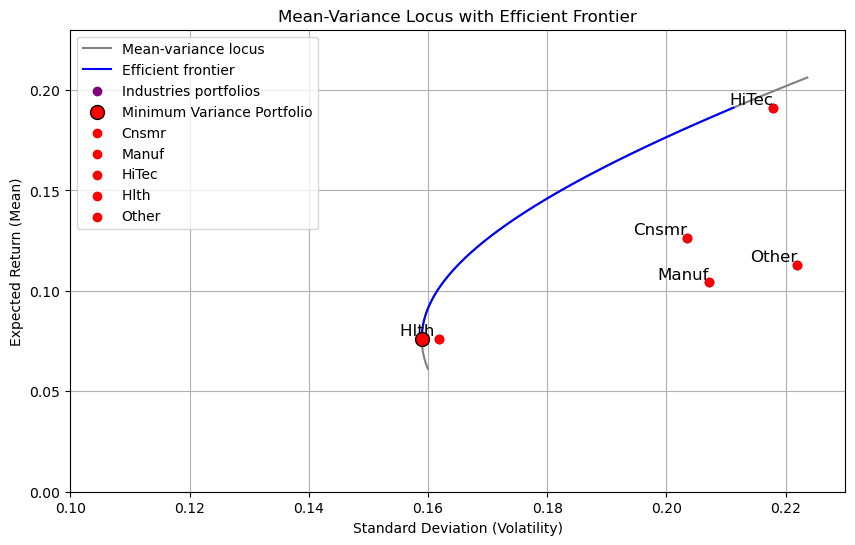

Lambda (lambda_theta[0]) : 0.010771119510272237
Theta (lambda_theta[1]) : 0.19028481734732516


In [10]:
#Frontière efficiente pour les 5 dernières années
#De façon analytique, sans actif sans risque et sans contrainte de non-vente à découvert
#def plot_efficient_frontier_an(ret, sigma, rf, include_CML=False, asset_names = None):
#    Paramètres :
#    ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    rf : float
#        Taux sans risque
#    include_CML : booléen, optionnel
#        Indique s'il faut inclure la ligne du marché des capitaux (CML) dans le graphique. Par défaut, c'est True.
#    asset_names : list, optionnel
#        Liste des noms des actifs. Par défaut, c'est None.
#    Si include_CML= False Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente
#       Lambda et theta, les multiplicateurs de Lagrange pour la frontière efficiente    
#    Si include_CML= True Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente et la ligne du marché des capitaux (CML)
#       Les données sur le portefeuille de marché (tangent) (poids, variance, écart-type, rendement)
#       Lambda et theta, les multiplicateurs de Lagrange pour la frontière efficiente
         
plot_efficient_frontier_an(exp_ret_5, Sigma_5, rf, False, Asset_names)

#2 Construire le graphique de « mean-variance locus » (avec l’actif sans risque) de ces 5 
portefeuilles d’industrie.

Portefeuille avec variance minimale: [ 0.22607542  0.17205275 -0.10484385  0.8205087  -0.11379302], Variance minimale: 0.025266620975911286, Écart-type minimal: 0.15895477651178427, Rendement minimal: 0.07617791933016155


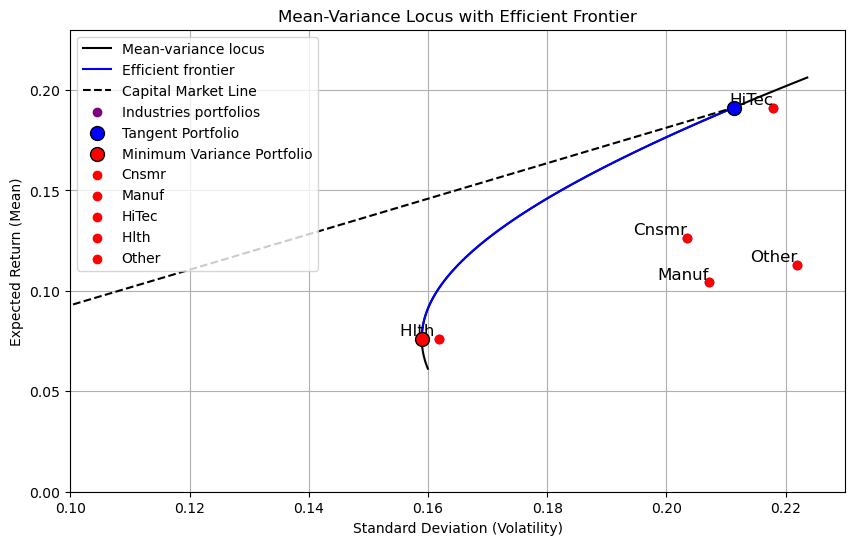

Poids optimaux du portefeuille tangent :
['Cnsmr', 'Manuf', 'HiTech', 'Hlth', 'Other'] [-0.42001842  0.2373861   1.37003914  0.16893461 -0.35634144]
Rendement du portefeuille tangent : 0.19119999999999998
Volatilité du portefeuille tangent : 0.21125479285602092
Lambda (lambda_theta[0]) : 0.010771119510272237
Theta (lambda_theta[1]) : 0.19028481734732516


In [11]:
#Frontière efficiente pour les 5 dernières années
#De façon analytique, avec actif sans risque et sans contrainte de non-vente à découvert
#def plot_efficient_frontier_an(ret, sigma, rf, include_CML=False, asset_names = None):
#    Paramètres :
#    ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    rf : float
#        Taux sans risque
#    include_CML : booléen, optionnel
#        Indique s'il faut inclure la ligne du marché des capitaux (CML) dans le graphique. Par défaut, c'est True.
#    asset_names : list, optionnel
#        Liste des noms des actifs. Par défaut, c'est None.
#    Si include_CML= False Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente
#       Lambda et theta, les multiplicateurs de Lagrange pour la frontière efficiente    
#    Si include_CML= True Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente et la ligne du marché des capitaux (CML)
#       Les données sur le portefeuille de marché (tangent) (poids, variance, écart-type, rendement)
#       Lambda et theta, les multiplicateurs de Lagrange pour la frontière efficiente


plot_efficient_frontier_an(exp_ret_5, Sigma_5, rf, True, Asset_names)

#3 Décrire le portefeuille de tangente et ses caractéristiques comme sa moyenne et variance et les poids de chaque actif. Vérifiez numériquement que le portefeuille de tangente est le portefeuille qui maximise le ratio de Sharpe.

Portefeuille avec variance minimale: [ 0.22607542  0.17205275 -0.10484385  0.8205087  -0.11379302], Variance minimale: 0.025266620975911286, Écart-type minimal: 0.15895477651178427, Rendement minimal: 0.07617791933016155
Tangent Portfolio Mean: 0.19119999999999998
Tangent Portfolio Variance: 0.044628587504640306
Tangent Portfolio Volatility: 0.21125479285602092
Tangent Portfolio Weights: [-0.42001842  0.2373861   1.37003914  0.16893461 -0.35634144]


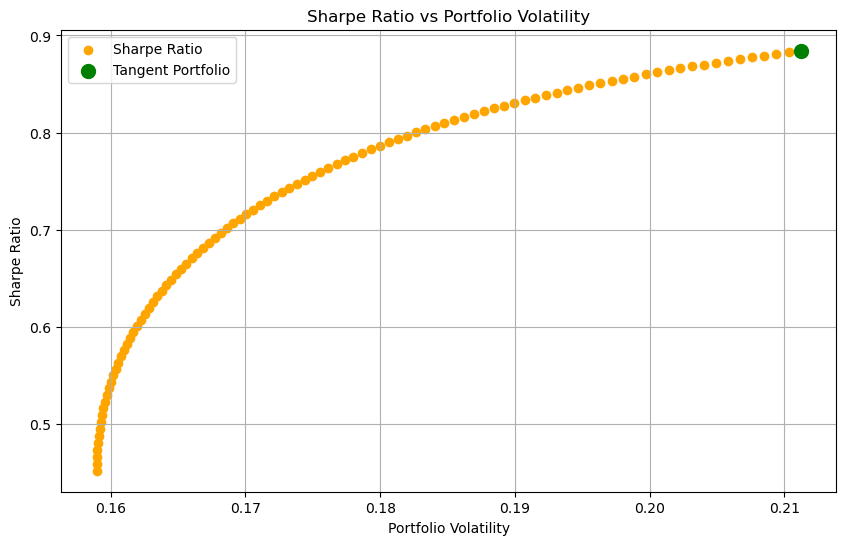

Sharpe Ratios: [0.4520781794416904, 0.45936173837076133, 0.4666082267302156, 0.4738159753249619, 0.48098334376042884, 0.48810872230326124, 0.4951905336779136, 0.502227234794491, 0.509217318403478, 0.5161593146732878, 0.5230517926868905, 0.5298933618541102, 0.5366826732365318, 0.5434184207823102, 0.5500993424685529, 0.5567242213493063, 0.5632918865075666, 0.569801213910102, 0.5762511271642639, 0.582640598176321, 0.5889686477112377, 0.5952343458541653, 0.6014368123742694, 0.6075752169918635, 0.6136487795501304, 0.6196567700930458, 0.6255985088513908, 0.6314733661390396, 0.637280762161953, 0.6430201667425585, 0.6486910989624124, 0.6542931267262433, 0.6598258662506487, 0.6652889814808847, 0.67068218343931, 0.6760052295091774, 0.6812579226575413, 0.6864401106011405, 0.6915516849191561, 0.6965925801167854, 0.701562772643581, 0.706462279870513, 0.7112911590296725, 0.7160495061205231, 0.720737454786535, 0.7253551751659795, 0.7299028727205886, 0.7343807870456837, 0.7387891906652837, 0.743128387

In [12]:
#Fonction pour trouver le ratio de Sharpe pour chaque portefeuille sur la frontière efficiente
#def max_sharpe_ratio(ret, sigma, rf):
# Trouve le portefeuille avec le ratio de Sharpe le plus élevé.
# Paramètres :
# ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    rf : float
#        Taux sans risque
# Retourne :
#    Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#    Les données sur le portefeuille de marché (tangent) (poids, variance, écart-type, rendement)
#    Un graphique de chaque ratio de Sharpe pour chaque portefeuille sur la frontière efficiente
#    Les ratios de Sharpe pour chaque portefeuille sur la frontière efficiente
#    Le ratio de Sharpe le plus élevé

  
max_sharpe_ratio(exp_ret_5, Sigma_5, rf)

#4 Construire le graphique de « mean-variance locus » (sans l’actif sans risque) avec les contraintes de vente à découverte sur chaque portefeuille d’industrie.

Return associated with minimum volatility: 0.08468464646191787
Std minimale: 0.15981164451120006
Poids du portefeuille variance minimale: [1.11188699e-01 8.57128729e-02 2.47712945e-22 8.03098428e-01
 4.09366716e-22]


([0.07626000000004457,
  0.07626000000005531,
  0.07626000000003977,
  0.07626000000003832,
  0.07626000000004637,
  0.07626000000002427,
  0.07626000000001898,
  0.07626000000000648,
  0.07626000000000945,
  0.07626000000000249,
  0.07626000000000192,
  0.07736444503760004,
  0.07882848540438654,
  0.08029252525541711,
  0.08175656567526335,
  0.08322060607033935,
  0.08468464646191787,
  0.08614868686719188,
  0.08761272727526778,
  0.08907676767619163,
  0.09054080806295281,
  0.09200484851482085,
  0.09346888891535184,
  0.0949329293006537,
  0.09639696967287781,
  0.09786101007367193,
  0.09932505051854176,
  0.10078909090947709,
  0.1022531313336629,
  0.10371717171784764,
  0.10518121212203942,
  0.10664525254092622,
  0.10810929295572477,
  0.10957333331887617,
  0.11103737375340964,
  0.11250141415053987,
  0.11396545451924543,
  0.1154294949433083,
  0.11689353535713862,
  0.11835757576374498,
  0.11982161616073869,
  0.12128565656787593,
  0.12274969698146777,
  0.1242137373

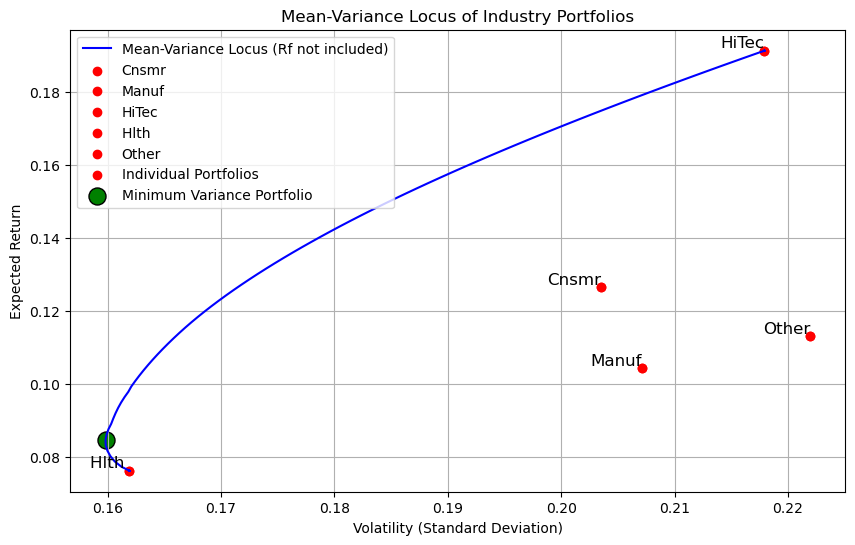

In [13]:
#Frontière efficiente pour les 5 dernières années
#De façon numérique, sans actif sans risque et avec contrainte de non-vente à découvert
#def plot_efficient_frontier_numerique(ret, sigma, sim, R_cible, rf, rf_asset=False, short_sales=False, asset_names = None):
#    Paramètres :
#    ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    sim : int
#        Nombre de simulations de portefeuilles à générer
#    R_cible : float
#        Rendement cible pour le portefeuille
#    rf : float
#        Taux sans risque
#    rf_asset: booléen, optionnel
#        Indique s'il faut inclure la ligne du marché des capitaux (CML) dans le graphique. Par défaut, c'est False.
#    short_sales : booléen, optionnel
#        Indique s'il faut permettre la vente à découvert. Par défaut, c'est False (pas de vente à découvert, contrainte activée).
#    asset_names : list, optionnel
#        Liste des noms des actifs. Par défaut, c'est None.
#    Si rf_asset= False Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente
#    Si rf_asset= True Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Les données sur le portefeuille de marché (tangent) (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente et la ligne du marché des capitaux (CML)

efficient_frontier_numerique(exp_ret_5, Sigma_5, sim, R_cible, rf, False, False, Asset_names)

#5 Construire le graphique de « mean-variance locus » (avec l’actif sans risque) avec les contraintes de vente à découverte sur chaque portefeuille d’industrie. Spécifiez chaque 
portefeuille d’industrie dans le graphique.

Return associated with minimum volatility: 0.08468464646191787
Std minimale: 0.15981164451120006
Poids du portefeuille variance minimale: [1.11188699e-01 8.57128729e-02 2.47712945e-22 8.03098428e-01
 4.09366716e-22]
Poids optimaux du portefeuille tangent [2.59238002e-19 3.11140076e-13 1.00000000e+00 6.66688885e-14
 1.70379700e-19]
Rendement du portefeuille tangent: 0.1912000000000004
Volatilité du portefeuille tangent: 0.2179211773484725


([0.07626000000004457,
  0.07626000000005531,
  0.07626000000003977,
  0.07626000000003832,
  0.07626000000004637,
  0.07626000000002427,
  0.07626000000001898,
  0.07626000000000648,
  0.07626000000000945,
  0.07626000000000249,
  0.07626000000000192,
  0.07736444503760004,
  0.07882848540438654,
  0.08029252525541711,
  0.08175656567526335,
  0.08322060607033935,
  0.08468464646191787,
  0.08614868686719188,
  0.08761272727526778,
  0.08907676767619163,
  0.09054080806295281,
  0.09200484851482085,
  0.09346888891535184,
  0.0949329293006537,
  0.09639696967287781,
  0.09786101007367193,
  0.09932505051854176,
  0.10078909090947709,
  0.1022531313336629,
  0.10371717171784764,
  0.10518121212203942,
  0.10664525254092622,
  0.10810929295572477,
  0.10957333331887617,
  0.11103737375340964,
  0.11250141415053987,
  0.11396545451924543,
  0.1154294949433083,
  0.11689353535713862,
  0.11835757576374498,
  0.11982161616073869,
  0.12128565656787593,
  0.12274969698146777,
  0.1242137373

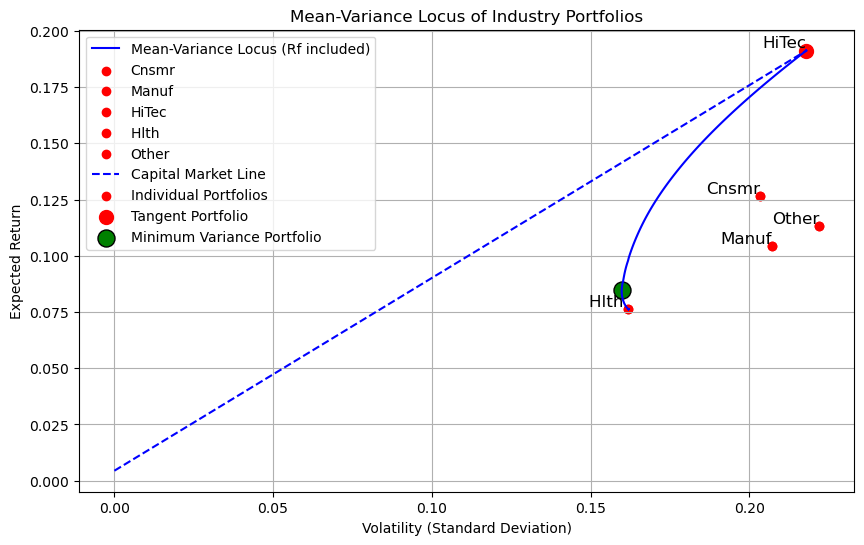

In [14]:
#Frontière efficiente pour les 5 dernières années
#De façon numérique, avec actif sans risque et avec contrainte de non-vente à découvert
#def plot_efficient_frontier_numerique(ret, sigma, sim, R_cible, rf, rf_asset=False, short_sales=False, asset_names = None):
#    Paramètres :
#    ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    sim : int
#        Nombre de simulations de portefeuilles à générer
#    R_cible : float
#        Rendement cible pour le portefeuille
#    rf : float
#        Taux sans risque
#    rf_asset: booléen, optionnel
#        Indique s'il faut inclure la ligne du marché des capitaux (CML) dans le graphique. Par défaut, c'est False.
#    short_sales : booléen, optionnel
#        Indique s'il faut permettre la vente à découvert. Par défaut, c'est False (pas de vente à découvert, contrainte activée).
#    asset_names : list, optionnel
#        Liste des noms des actifs. Par défaut, c'est None.

efficient_frontier_numerique(exp_ret_5, Sigma_5, sim, R_cible, rf, True, False, Asset_names)

#6  Décrire le portefeuille de tangente et ses caractéristiques comme sa moyenne et variance et 
les poids de chaque actif. Vérifiez numériquement que le portefeuille de tangente est le 
portefeuille qui maximise le ratio de Sharpe. 

Return associated with minimum volatility: 0.08468464646191787
Std minimale: 0.15981164451120006
Poids du portefeuille variance minimale: [1.11188699e-01 8.57128729e-02 2.47712945e-22 8.03098428e-01
 4.09366716e-22]


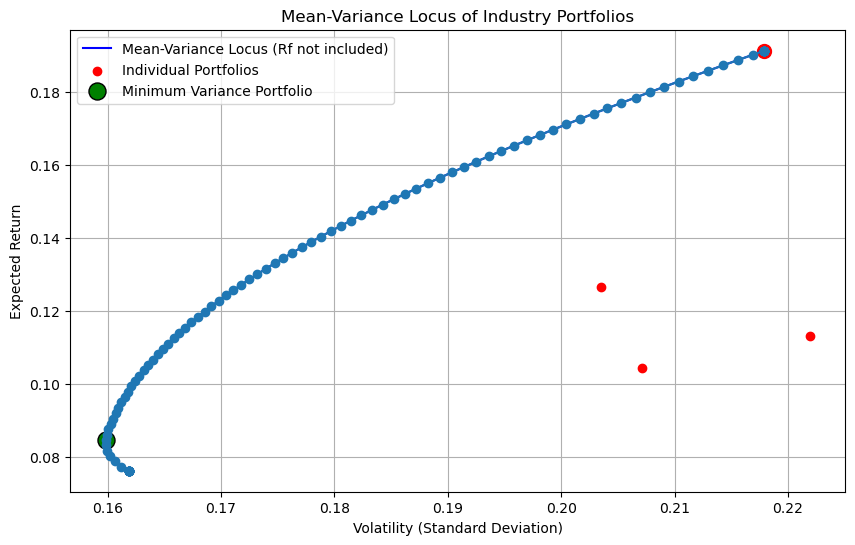

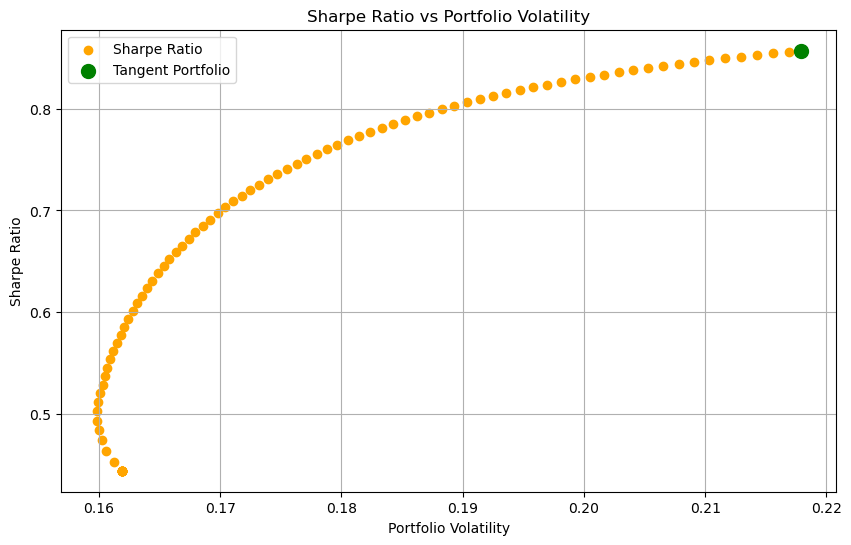

Sharpe Ratios: [0.4438035066991485, 0.443803506699196, 0.4438035066991973, 0.44380350669920837, 0.44380350669917995, 0.44380350669911034, 0.44380350669911056, 0.44380350669905455, 0.44380350669905777, 0.44380350669904334, 0.4438035066990411, 0.45260651987805633, 0.4633966192725202, 0.47363176580627586, 0.48355154859929483, 0.49313884677123476, 0.5023704418252907, 0.5112255008177887, 0.5198472914981981, 0.5282009845321971, 0.5367157580566906, 0.545152010983273, 0.5534747618607209, 0.5616583226763698, 0.5696837617488358, 0.5775428441942058, 0.5856321488477766, 0.5934219607674334, 0.6011092079178953, 0.6086923499525193, 0.6161699767301553, 0.6235408070105324, 0.6308036881043388, 0.6379575948242237, 0.6450016291323624, 0.6519350165522179, 0.6587570958041126, 0.6654598063893388, 0.6720361456272231, 0.6784857051872893, 0.6848075789418409, 0.6910036279696123, 0.6970719014804548, 0.7030132333429786, 0.7088279264238033, 0.7145116823021477, 0.7200778760867126, 0.7255170192721081, 0.7308307077206

In [15]:
#Frontière efficiente pour les 5 dernières années
#Calcule les ratios de Sharpe pour chaque portefeuille sur la frontière efficiente
#def plot_efficient_frontier_num_tangent(ret, sigma, sim, rf, R_cible, rf_asset=False, short_sales=False):
#    Paramètres :
#    ret : numpy array
#        Matrice des rendements des actifs
#    sigma : numpy array
#        Matrice de covariance des rendements des actifs
#    sim : int
#        Nombre de simulations de portefeuilles à générer
#    rf : float
#        Taux sans risque
#    R_cible : float
#        Rendement cible pour le portefeuille
#    rf_asset: booléen, optionnel
#        Indique s'il faut inclure la ligne du marché des capitaux (CML) dans le graphique. Par défaut, c'est False.
#    short_sales : booléen, optionnel
#        Indique s'il faut permettre la vente à découvert. Par défaut, c'est False (pas de vente à découvert, contrainte activée).
#    Retourne :
#       Les données sur le portefeuille de variance minimale (poids, variance, écart-type, rendement)
#       Un graphique de la frontière efficiente
#       Un graphique de chaque ratio de Sharpe pour chaque portefeuille sur la frontière efficiente
#       Les ratios de Sharpe pour chaque portefeuille sur la frontière efficiente
#       Le ratio de Sharpe le plus élevé
#       Les données sur le portefeuille de marché (tangent) (poids, variance, écart-type, rendement)

plot_efficient_frontier_num_tangent(exp_ret_5, Sigma_5, sim, R_cible, rf, False, False)

#7 Répétez les mêmes calculs en utilisant les 10 dernières années au lieu des 5 dernières années.

Portefeuille avec variance minimale: [ 0.32214523  0.30359556 -0.03385146  0.56107537 -0.1529647 ], Variance minimale: 0.019099285386452818, Écart-type minimal: 0.1382001642055928, Rendement minimal: 0.0965984532239215


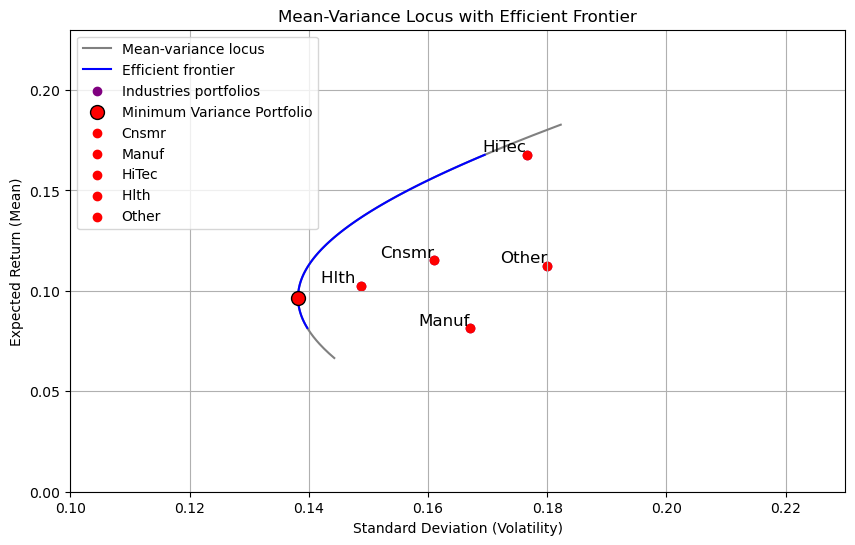

Lambda (lambda_theta[0]) : 0.0032568204476983303
Theta (lambda_theta[1]) : 0.16400329829330337
Portefeuille avec variance minimale: [ 0.32214523  0.30359556 -0.03385146  0.56107537 -0.1529647 ], Variance minimale: 0.019099285386452818, Écart-type minimal: 0.1382001642055928, Rendement minimal: 0.0965984532239215


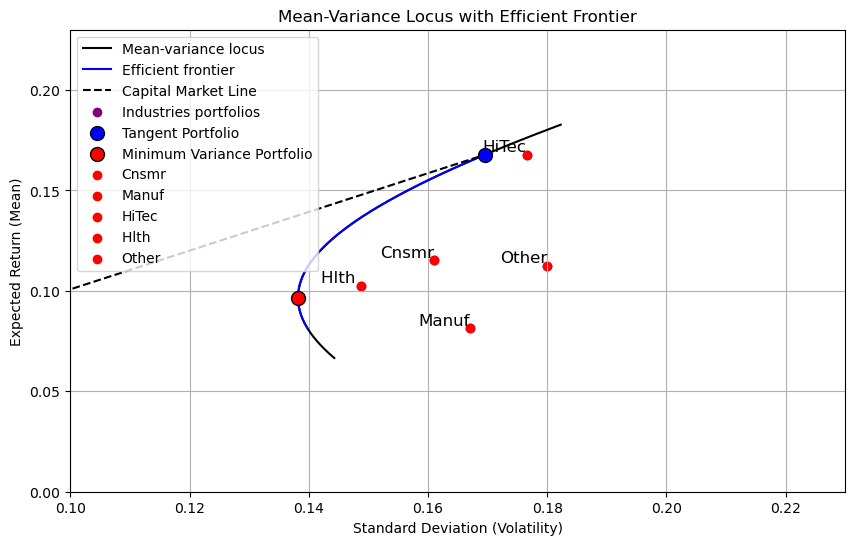

Poids optimaux du portefeuille tangent :
['Cnsmr', 'Manuf', 'HiTech', 'Hlth', 'Other'] [-0.23518648 -0.36265975  1.15061846  0.3950622   0.05216556]
Rendement du portefeuille tangent : 0.16771999999999998
Volatilité du portefeuille tangent : 0.16950479929572324
Lambda (lambda_theta[0]) : 0.0032568204476983303
Theta (lambda_theta[1]) : 0.16400329829330337
Portefeuille avec variance minimale: [ 0.32214523  0.30359556 -0.03385146  0.56107537 -0.1529647 ], Variance minimale: 0.019099285386452818, Écart-type minimal: 0.1382001642055928, Rendement minimal: 0.0965984532239215
Tangent Portfolio Mean: 0.16771999999999998
Tangent Portfolio Variance: 0.028731876984283415
Tangent Portfolio Volatility: 0.16950479929572324
Tangent Portfolio Weights: [-0.23518648 -0.36265975  1.15061846  0.3950622   0.05216556]


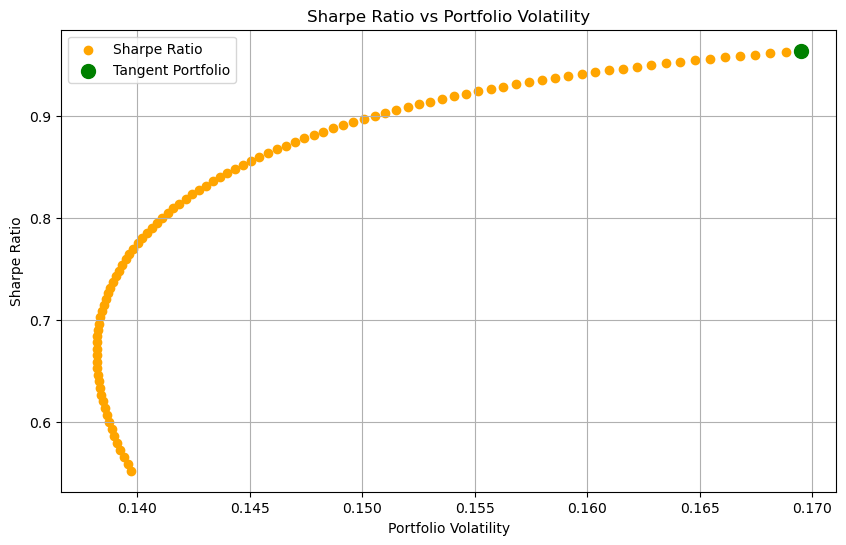

Sharpe Ratios: [0.5521302807724725, 0.5590511055551999, 0.5659480068240208, 0.5728192487798635, 0.5796631005507162, 0.5864778382135253, 0.5932617468252721, 0.6000131224579707, 0.6067302742322328, 0.6134115263439915, 0.6200552200789233, 0.6266597158091011, 0.6332233949664194, 0.6397446619873719, 0.6462219462238183, 0.6526537038144785, 0.6590384195119942, 0.6653746084605537, 0.6716608179192259, 0.6778956289263497, 0.6840776579005319, 0.6902055581740416, 0.6962780214546379, 0.7022937792121463, 0.7082516039863809, 0.714150310613314, 0.7199887573667152, 0.7257658470127979, 0.7314805277757626, 0.7371317942124533, 0.7427186879947001, 0.7482402985982676, 0.7536957638976799, 0.7590842706665397, 0.7644050549833017, 0.7696574025428085, 0.7748406488742138, 0.7799541794662559, 0.7849974298011366, 0.7899698852985789, 0.794871081171904, 0.7997006021982435, 0.8044580824052581, 0.8091432046769593, 0.8137557002814585, 0.8182953483236499, 0.8227619751260281, 0.8271554535409885, 0.8314757021980937, 0.8357

In [16]:
#Frontière efficiente pour les 10 dernières années
#De façon analytique, sans actif sans risque et sans contrainte de non-vente à découvert
plot_efficient_frontier_an(exp_ret_10, Sigma_10, rf, False, Asset_names)

#Frontière efficiente pour les 10 dernières années
#De façon analytique, avec actif sans risque et sans contrainte de non-vente à découvert
plot_efficient_frontier_an(exp_ret_10, Sigma_10, rf, True, Asset_names)

#Fonction pour trouver le ratio de Sharpe pour chaque portefeuille sur la frontière efficiente
max_sharpe_ratio(exp_ret_10, Sigma_10, rf)



Return associated with minimum volatility: 0.10175999997673187
Std minimale: 0.1389086068411677
Poids du portefeuille variance minimale: [2.53173926e-01 2.04781174e-01 1.90879465e-22 5.42044900e-01
 2.42870359e-22]
Return associated with minimum volatility: 0.10175999997673187
Std minimale: 0.1389086068411677
Poids du portefeuille variance minimale: [2.53173926e-01 2.04781174e-01 1.90879465e-22 5.42044900e-01
 2.42870359e-22]
Poids optimaux du portefeuille tangent [6.45872245e-14 0.00000000e+00 1.00000000e+00 5.27633492e-14
 3.05588888e-14]
Rendement du portefeuille tangent: 0.16042666665195368
Volatilité du portefeuille tangent: 0.16825043613881066
Return associated with minimum volatility: 0.10175999997673187
Std minimale: 0.1389086068411677
Poids du portefeuille variance minimale: [2.53173926e-01 2.04781174e-01 1.90879465e-22 5.42044900e-01
 2.42870359e-22]


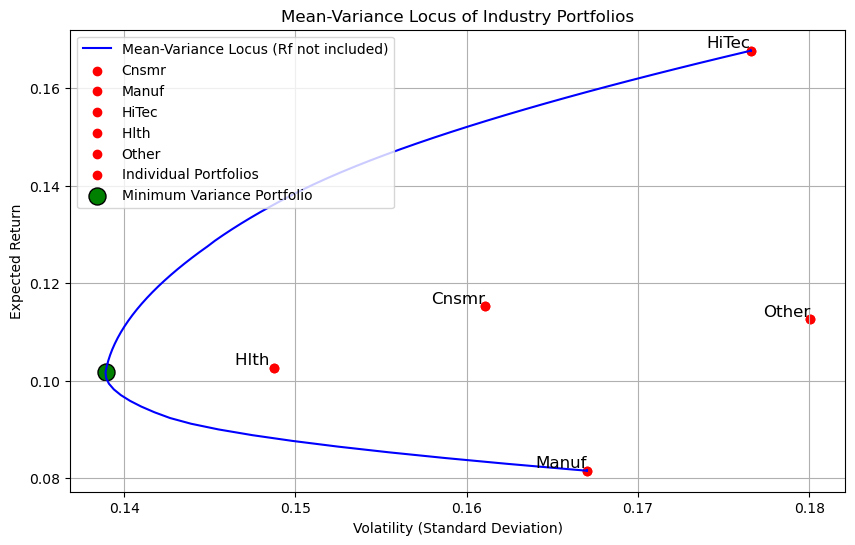

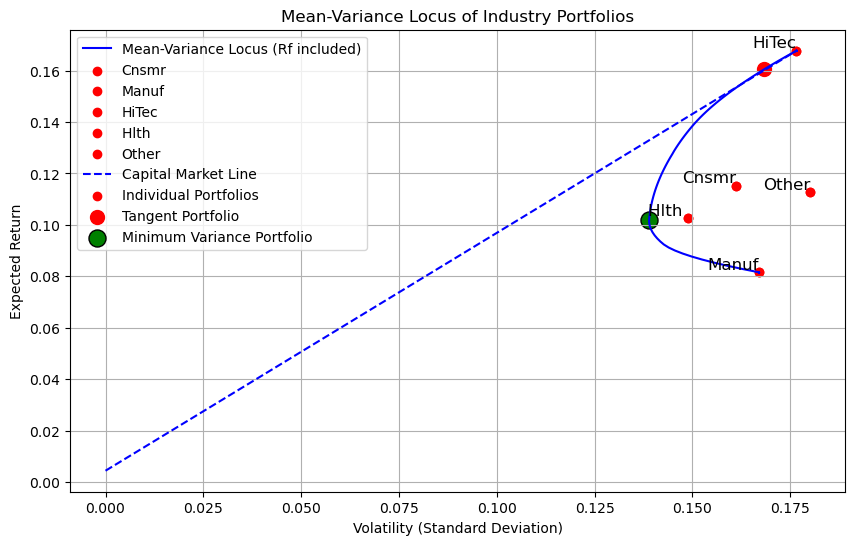

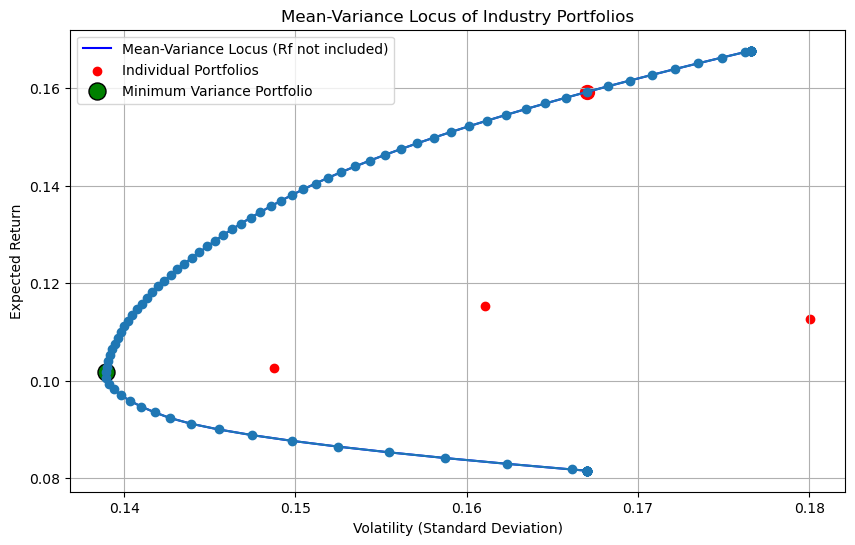

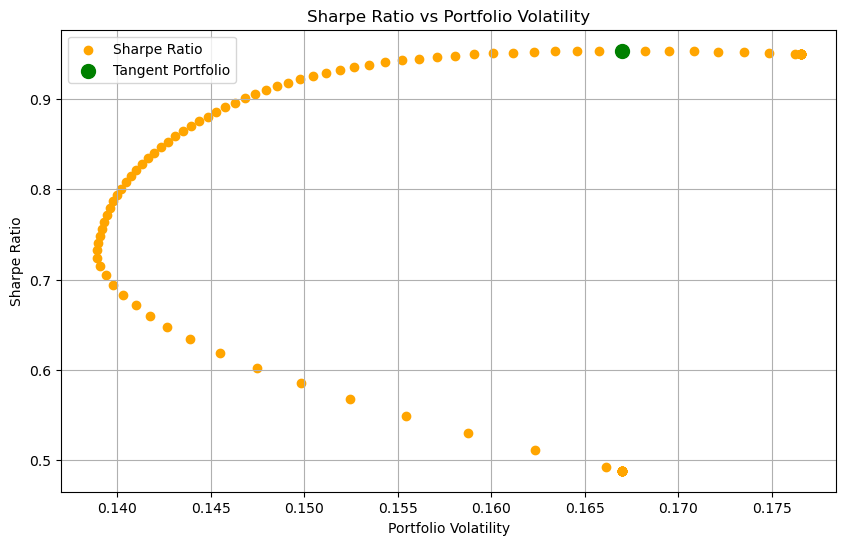

Sharpe Ratios: [0.4883440517878702, 0.48834405178786305, 0.48834405178804674, 0.48834405178800977, 0.4883440517878055, 0.4883440517878461, 0.48834405178776974, 0.4883440517877596, 0.4883440517876706, 0.4883440517877399, 0.4883440517876763, 0.48834405178770907, 0.48834405178764956, 0.4923988864303069, 0.511258364797863, 0.5301441950693913, 0.5488972028362165, 0.5673361837832728, 0.5852606461942181, 0.6024554256358768, 0.6186973290943671, 0.6337635571079696, 0.6474415372588553, 0.6598486358338231, 0.6717926318477053, 0.6832868536395597, 0.6942872154833916, 0.7047478844792514, 0.7146443467150112, 0.7239292248825953, 0.7325679976985683, 0.7406425044347574, 0.7486034395050828, 0.7564479732865338, 0.7641732758944649, 0.7717766836996708, 0.7792557054827508, 0.78660802712979, 0.7938315123457587, 0.8009242082576462, 0.8078843363070511, 0.8147101865493195, 0.8214001114235505, 0.8279540204760417, 0.8343706190893503, 0.8406481383388077, 0.846786402761898, 0.8527849749456773, 0.8586435747584734, 0.

In [17]:
#Frontière efficiente pour les 10 dernières années
#De façon numérique, sans actif sans risque et avec contrainte de non-vente à découvert
efficient_frontier_numerique(exp_ret_10, Sigma_10, sim, R_cible, rf, False, False, Asset_names)

#Frontière efficiente pour les 10 dernières années
#De façon numérique, avec actif sans risque et avec contrainte de non-vente à découvert
efficient_frontier_numerique(exp_ret_10, Sigma_10, sim, R_cible, rf, True, False, Asset_names)

#Frontière efficiente pour les 10 dernières années
#Calcule les ratios de Sharpe pour chaque portefeuille sur la frontière efficiente
plot_efficient_frontier_num_tangent(exp_ret_10, Sigma_10, sim, rf, False, False)

# Partie B

#1 Rééchantillonnez (avec remplacement) à partir de vos données originales et créez un nouvel 
échantillon bootstrap de 60 mois. Répétez cela 100 fois, c'est-à-dire créez 100 échantillons 
bootstrap et réalisez l'analyse des points 1 à 6 de la partie A pour démontrer l'effet de 
l'incertitude d'estimation sur le lieu efficient en moyenne-variance et les portefeuilles 
tangents calculés dans les points 1 à 6

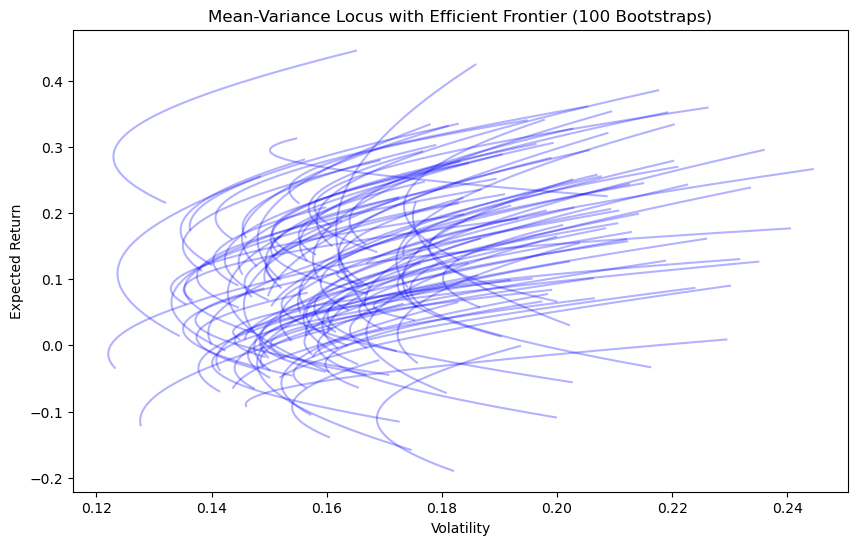

('Tangent weights: [-0.44024914  2.45601788  2.81932217 -3.57602246 -0.25906845]',
 'Mean tangent returns: 1.0386451150028868',
 'Mean tangent variance: 15.501860378391063',
 'Mean tangent Sharpe ratio: 2.58930326817572')

In [18]:
bootstrap_A(rets_5, 0.10, 0.0044, 'moyenne', 100, cov_lw=True, include_CML=False)

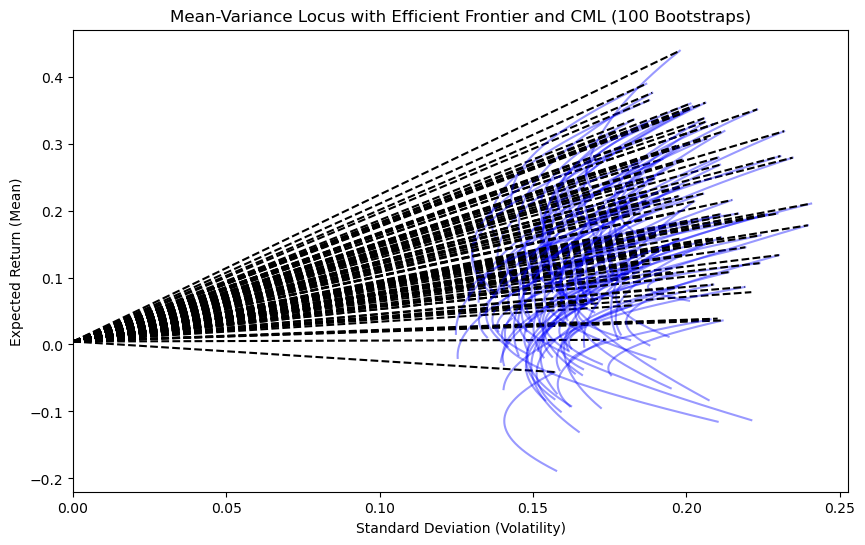

('Tangent weights: [ 0.31492162  1.62737486  1.29826989 -1.04693956 -1.19362682]',
 'Mean tangent returns: 0.5565205416674243',
 'Mean tangent variance: 7.635990014116619',
 'Mean tangent Sharpe ratio: 2.5697370789235148')

In [19]:
bootstrap_A(rets_5, 0.10, 0.0044, 'moyenne', 100, cov_lw=True, include_CML=True)

c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\gabri\anaconda3\

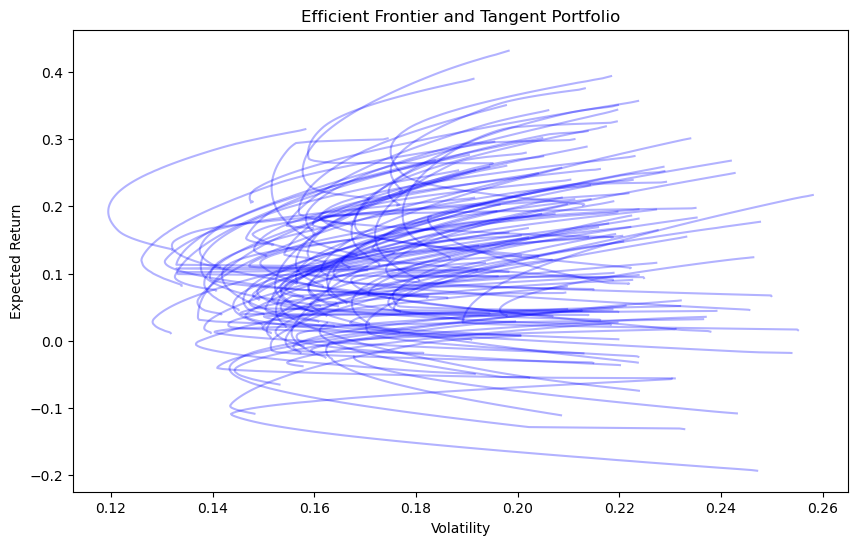

(array([-4.48224009e-04, -2.22619911e-04,  1.00216264e+00, -7.85734898e-04,
        -1.75469851e-04]),
 0.1952264573913799,
 0.045525290350886934,
 3.1507567335171185)

In [20]:
bootstrap_N(rets_5, 0.10, 0.0044, 'moyenne', 100, cov_lw=True, include_CML=False)

c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\gabri\anaconda3\

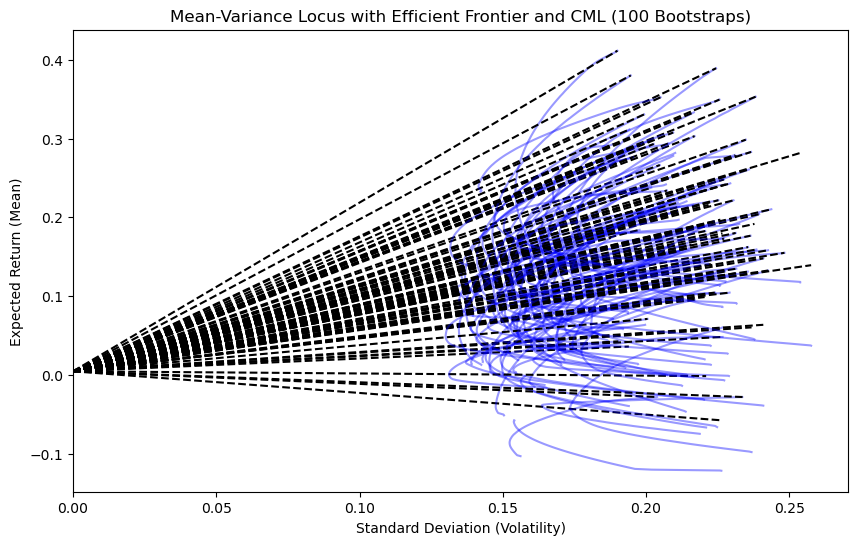

(array([-6.53603492e-04, -9.77148097e-04,  1.01005980e+00, -3.09623253e-03,
        -4.04129142e-04]),
 0.19514807551951346,
 0.0450991428215892,
 3.1331208267639785)

In [21]:
bootstrap_N(rets_5, 0.10, 0.0044, 'moyenne', 100, cov_lw=True, include_CML=True)

#2 Vous voulez minimiser les coûts de transactions. Vous voulez investir dans maximum 3 
portefeuilles de la liste originale de 5 portefeuilles d’industrie.

c:\Users\gabri\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Meilleure combinaison d'actifs: ['Cnsmr', 'HiTec', 'Hlth ']
Portefeuille avec variance minimale: [ 0.25587744 -0.13027266  0.87439521], Variance minimale: 0.025360662257875814, Écart-type minimal: 0.159250313211233, Rendement minimal: 0.07412127332410968


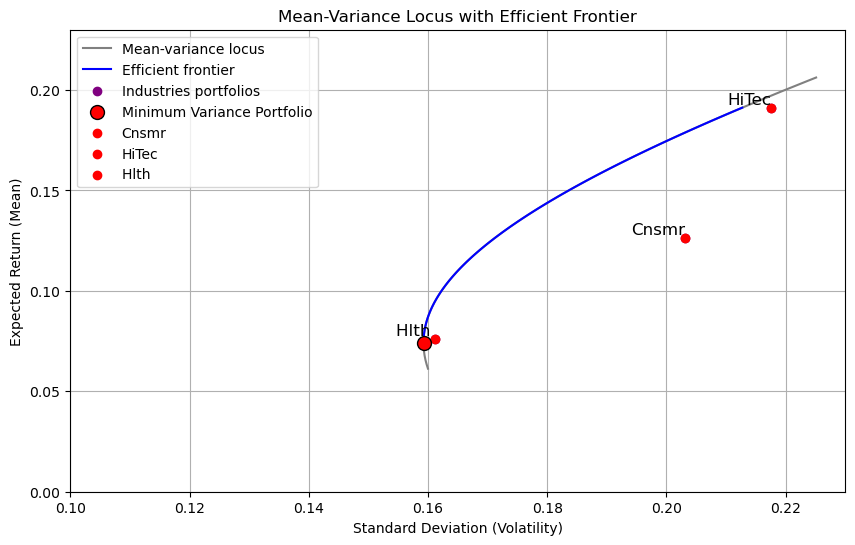

Lambda (lambda_theta[0]) : 0.011155925414266687
Theta (lambda_theta[1]) : 0.19164183515164596
Portefeuille avec variance minimale: [ 0.25587744 -0.13027266  0.87439521], Variance minimale: 0.025360662257875814, Écart-type minimal: 0.159250313211233, Rendement minimal: 0.07412127332410968


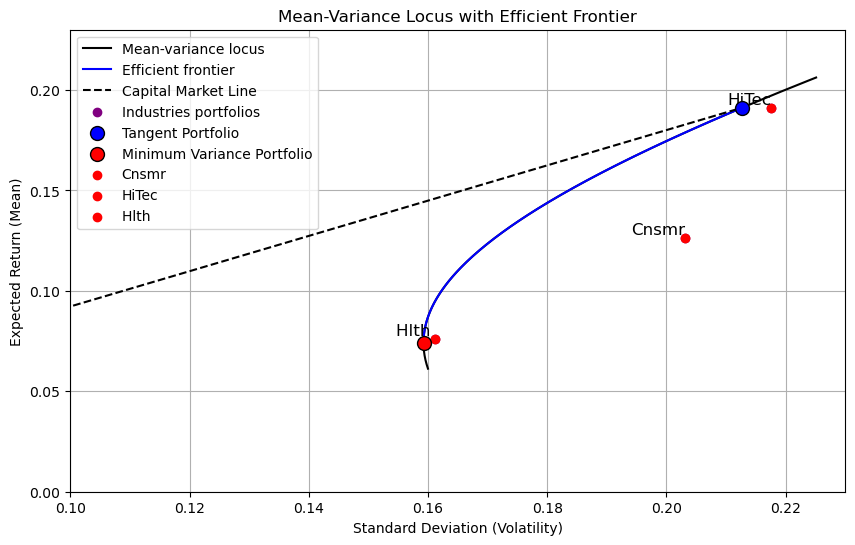

Poids optimaux du portefeuille tangent :
['Cnsmr', 'Manuf', 'HiTech', 'Hlth', 'Other'] [-0.53256885  1.36291677  0.16965208]
Rendement du portefeuille tangent : 0.19119999999999998
Volatilité du portefeuille tangent : 0.2127197317531527
Lambda (lambda_theta[0]) : 0.011155925414266687
Theta (lambda_theta[1]) : 0.19164183515164596
Portefeuille avec variance minimale: [ 0.25587744 -0.13027266  0.87439521], Variance minimale: 0.025360662257875814, Écart-type minimal: 0.159250313211233, Rendement minimal: 0.07412127332410968
Tangent Portfolio Mean: 0.19119999999999998
Tangent Portfolio Variance: 0.045249684277133245
Tangent Portfolio Volatility: 0.2127197317531527
Tangent Portfolio Weights: [-0.53256885  1.36291677  0.16965208]


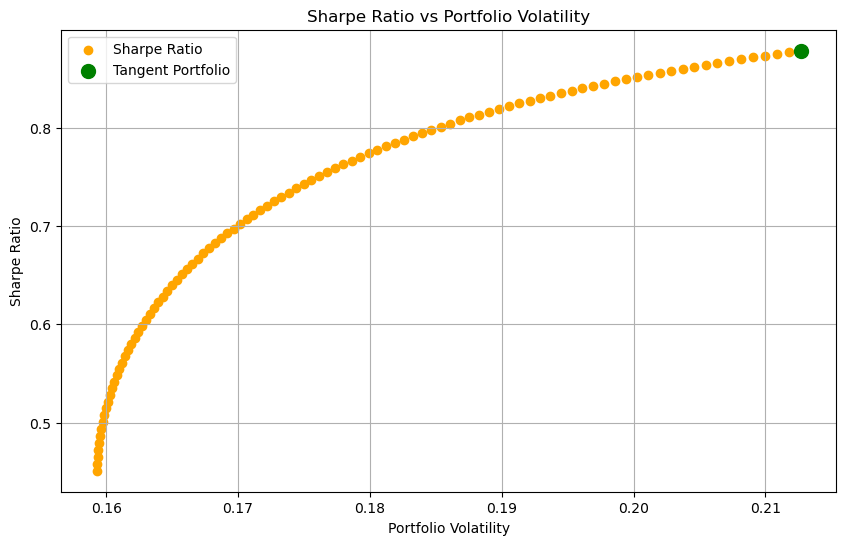

Sharpe Ratios: [0.45118026731042776, 0.45838701923059894, 0.46555531763442204, 0.47268356492470115, 0.4797701940438742, 0.4868136701811919, 0.4938124924117335, 0.5007651952632505, 0.5076703502071089, 0.5145265670699257, 0.5213324953628039, 0.5280868255254224, 0.5347882900825706, 0.5414356647110691, 0.5480277692153813, 0.5545634684105704, 0.5610416729116187, 0.5674613398284843, 0.5738214733666163, 0.5801211253329994, 0.5863593955481394, 0.5925354321647215, 0.5986484318939959, 0.6046976401412474, 0.6106823510519909, 0.6166019074708119, 0.6224557008150253, 0.6282431708655641, 0.6339638054777295, 0.6396171402146349, 0.6452027579063573, 0.6507202881379706, 0.6561694066697743, 0.6615498347931588, 0.6668613386256393, 0.6721037283486836, 0.6772768573920122, 0.6823806215680958, 0.6874149581606065, 0.6923798449705759, 0.6972752993240179, 0.7021013770447405, 0.7068581713960356, 0.7115458119948856, 0.7161644637022584, 0.720714325492979, 0.7251956293085935, 0.7296086388965266, 0.7339536486387374, 0

In [22]:
best_combination, best_weights, best_variance =  best_comb_portefeuille(rets_5, 5, 3, 3, 0.05, 0.10, 0.01, 0.10, Asset_names)

ret_2b = exp_rets(rets_5[[best_combination[0], best_combination[1], best_combination[2]]], 0.94, method='moyenne')
cov_2b = covariance_matrix(rets_5[[best_combination[0], best_combination[1], best_combination[2]]])

Asset_names3 = [best_combination[0], best_combination[1], best_combination[2]]

plot_efficient_frontier_an(ret_2b, cov_2b, 0.0044, False, Asset_names3)
plot_efficient_frontier_an(ret_2b, cov_2b, 0.0044, True, Asset_names3)

max_sharpe_ratio(ret_2b, cov_2b, rf)


Return associated with minimum volatility: 0.083220605329574
Std minimale: 0.1597589442955195
Poids du portefeuille variance minimale: [1.48423594e-01 4.89212216e-22 8.51576406e-01]
Return associated with minimum volatility: 0.083220605329574
Std minimale: 0.1597589442955195
Poids du portefeuille variance minimale: [1.48423594e-01 4.89212216e-22 8.51576406e-01]
Poids optimaux du portefeuille tangent [3.68921556e-13 1.00000000e+00 9.03710954e-17]
Rendement du portefeuille tangent: 0.1912
Volatilité du portefeuille tangent: 0.21759258142987184
Return associated with minimum volatility: 0.083220605329574
Std minimale: 0.1597589442955195
Poids du portefeuille variance minimale: [1.48423594e-01 4.89212216e-22 8.51576406e-01]


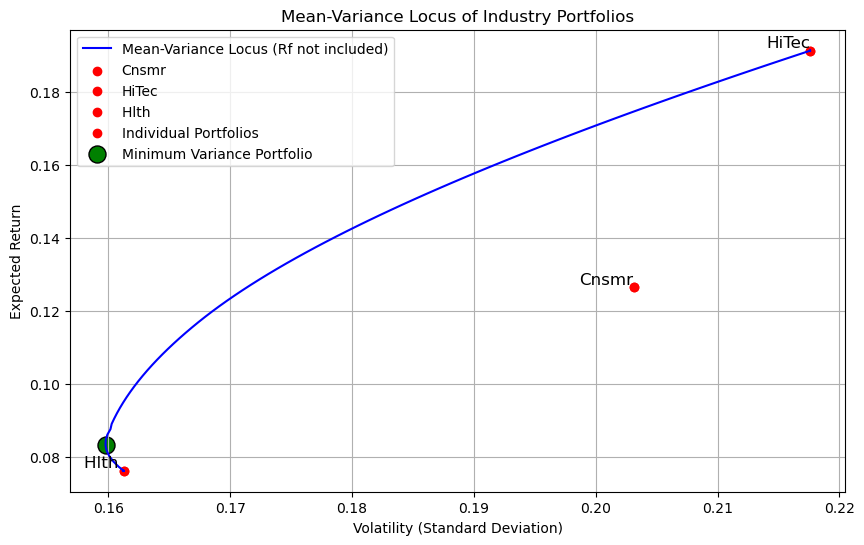

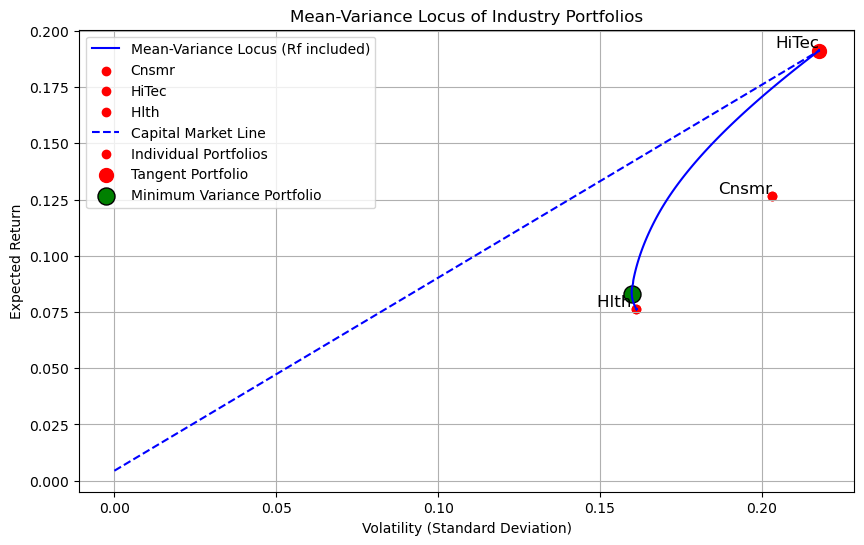

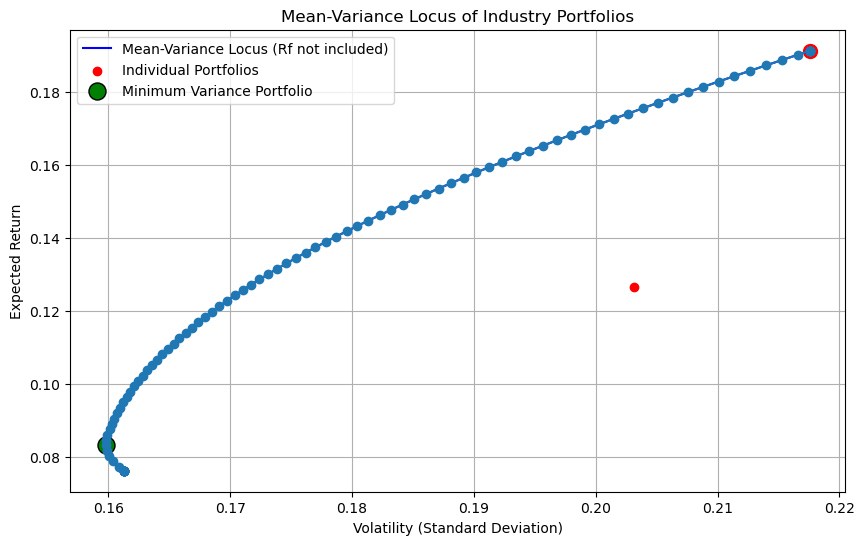

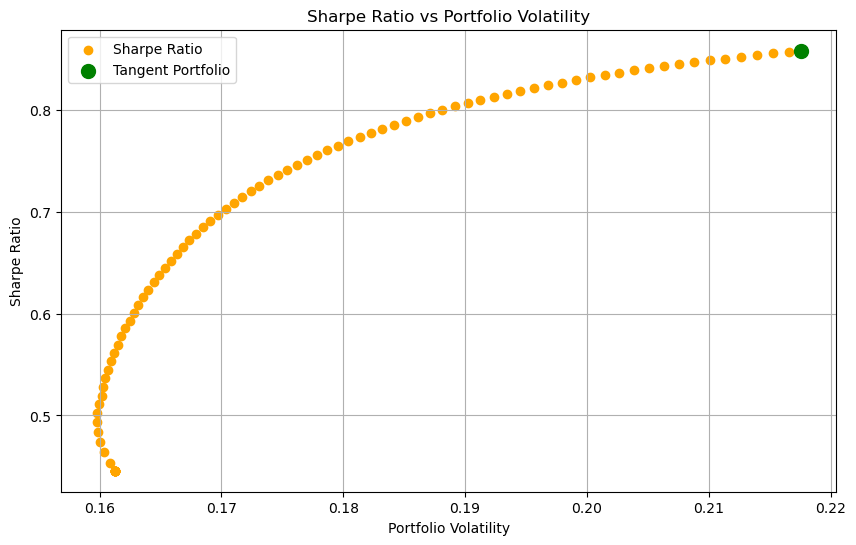

Sharpe Ratios: [0.44566782233833535, 0.44566782233835106, 0.44566782233831487, 0.445667822338339, 0.445667822338395, 0.4456678223382737, 0.44566782233828084, 0.4456678223382736, 0.4456678223382725, 0.4456678223382707, 0.44566782233826574, 0.4536640401912241, 0.4640384108802105, 0.4741312466856175, 0.48391706041826515, 0.493372096799619, 0.5024746140629757, 0.511205131949415, 0.51954663955646, 0.528351366241761, 0.5367904378516932, 0.5451429309956233, 0.5534065188497264, 0.5615789883067839, 0.5696582439198477, 0.5776423093481713, 0.5855293289833963, 0.5933175698506266, 0.6010054190498331, 0.6085913894957135, 0.6160741183750023, 0.6234523616562025, 0.6307250010223987, 0.6378910370574945, 0.644949593615964, 0.6518999119212935, 0.6587413460106598, 0.6654733724154657, 0.6720955725180133, 0.6785990169240255, 0.684972440102339, 0.6912155973904536, 0.6973284344587468, 0.7033110466044957, 0.7091636726405697, 0.7148866905661808, 0.7204806096235017, 0.7259460665459077, 0.7312838164307094, 0.73649

In [23]:
efficient_frontier_numerique(ret_2b, cov_2b, 100, R_cible, 0.0044, False, False, Asset_names3)
efficient_frontier_numerique(ret_2b, cov_2b, 100, R_cible, 0.0044, True, False, Asset_names3)

plot_efficient_frontier_num_tangent(ret_2b, cov_2b, sim, R_cible, rf, False, False)